In [46]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

In [48]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

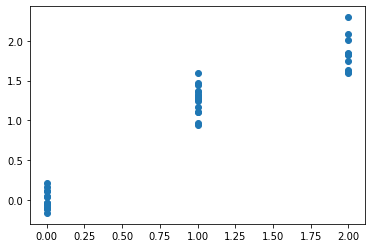

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt  

predictions = clf_lr.predict(x_test)
plt.scatter(y_test,predictions)

In [50]:
import pandas as pd

coeff_df = pd.DataFrame(clf_lr.coef_,iris.feature_names,columns=['Coefficient'])
coeff_df

,Coefficient
sepal length (cm),-0.170094
sepal width (cm),-0.018566
petal length (cm),0.279002
petal width (cm),0.560613


In [51]:
clf_lr.intercept_

0.3501722420686384

In [52]:
b0 = clf_lr.intercept_
b1 = clf_lr.coef_[0]
b2 = clf_lr.coef_[1]
b3 = clf_lr.coef_[2]
b4 = clf_lr.coef_[3]
print(b0,b1,b2,b3,b4)

0.3501722420686384 -0.17009418265222548 -0.018566210773940328 0.27900206419721973 0.5606127430964811


In [59]:
print(X[0:5])
print(Y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [60]:
for i in X[0:5]:
    print(b0+b1*i[0]+b2*i[1]+b3*i[2]+b4*i[3])

-0.07956438867109876
-0.03626244675368366
-0.033857058797748515
0.04080939338431201
-0.0644115914832704


Uji coba dengan persamaan berikut :

## $$ y = b_0 + b_1x_1 $$

In [55]:
y_result = []
count = 0
for i in X:
    y_result.append(b0+b1*i[0]+b2*i[1]+b3*i[2]+b4*i[3])
    count +=1

In [62]:
import numpy as np

np.c_[y_result, iris.target]

array([[-7.95643887e-02,  0.00000000e+00],
       [-3.62624468e-02,  0.00000000e+00],
       [-3.38570588e-02,  0.00000000e+00],
       [ 4.08093934e-02,  0.00000000e+00],
       [-6.44115915e-02,  0.00000000e+00],
       [ 5.78040401e-02,  0.00000000e+00],
       [ 6.34005980e-02,  0.00000000e+00],
       [-3.27981429e-02,  0.00000000e+00],
       [ 5.06412656e-02,  0.00000000e+00],
       [-6.62801357e-02,  0.00000000e+00],
       [-1.06405679e-01,  0.00000000e+00],
       [ 2.91209000e-02,  0.00000000e+00],
       [-7.53143028e-02,  0.00000000e+00],
       [-7.39678307e-02,  0.00000000e+00],
       [-2.63713835e-01,  0.00000000e+00],
       [-5.83077329e-02,  0.00000000e+00],
       [-5.37967856e-02,  0.00000000e+00],
       [-2.35031144e-02,  0.00000000e+00],
       [-4.74288679e-02,  0.00000000e+00],
       [-1.17277117e-03,  0.00000000e+00],
       [-4.50354031e-02,  0.00000000e+00],
       [ 5.67451242e-02,  0.00000000e+00],
       [-1.07974744e-01,  0.00000000e+00],
       [ 1.

In [57]:
df_prf = pd.DataFrame(data=np.c_[y_result,iris.target],
                     columns=['Y Predict','Y Actual'])

df_prf.head()

,Y Predict,Y Actual
0,-0.079564,0.0
1,-0.036262,0.0
2,-0.033857,0.0
3,0.040809,0.0
4,-0.064412,0.0


In [66]:
y_predict = []
for x in y_result:
    y_predict.append(abs(round(x)))

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_predict,Y))
print(classification_report(y_predict,Y))

[[50  0  0]
 [ 0 47  1]
 [ 0  3 49]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.94      0.98      0.96        48
         2.0       0.98      0.94      0.96        52

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

